In [1]:
library(data.table) 
library(Seurat)
library(ggplot2)
library(ComplexUpset)
library(readxl)
options(repr.plot.width=10, repr.plot.height=10)


The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject



In [2]:
bm_preprocess <- read_excel("bm.xlsx", sheet = "preprocessing")
bm_preprocess$Run <- factor(bm_preprocess$Run, levels= bm_preprocess$Run)
bm_preprocess$totaltime<- rowSums(bm_preprocess[,2:5])
bm_preprocess$totaltime <- round(bm_preprocess$totaltime, 2)
bm_preprocess <- melt(bm_preprocess, id.vars = c("Run", "totaltime"), value.name = 'Runtime', variable.name = 'Method')


Warning message in melt(bm_preprocess, id.vars = c("Run", "totaltime"), value.name = "Runtime", :
"The melt generic in data.table has been passed a tbl_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(bm_preprocess). In the next version, this warning will become an error."


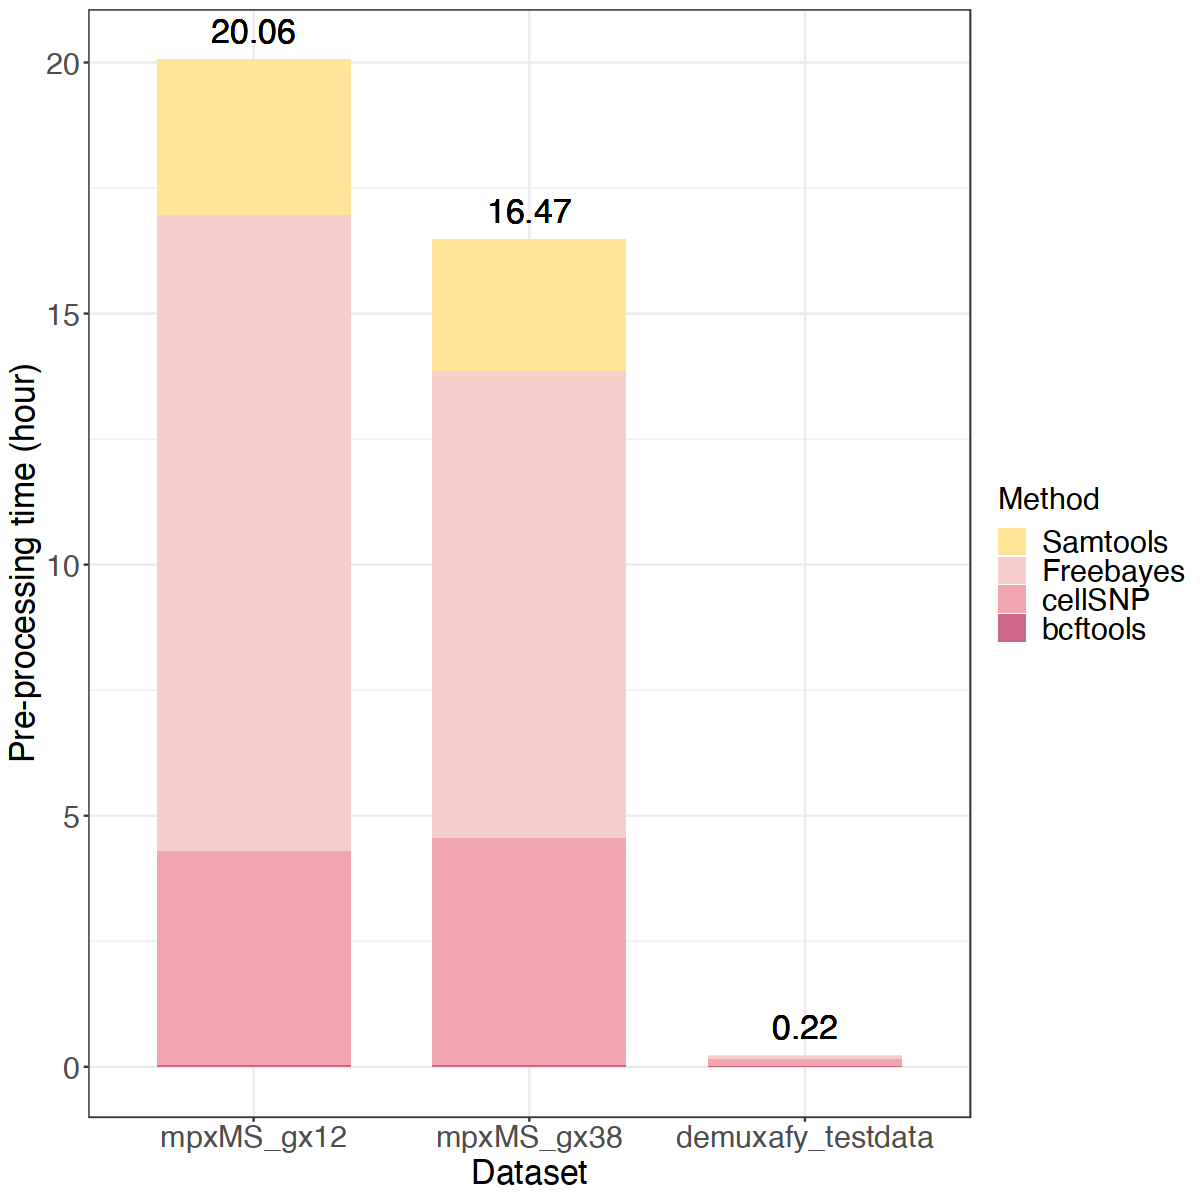

In [3]:
ggplot(bm_preprocess, aes(x=Run, y=Runtime, fill=Method)) +
  geom_bar(stat="identity", width=0.7) + 
  scale_fill_manual(values = c("#FFE599", "#F8CECC", "#F0A5AF", "#CD6688")) + 
  theme_bw() + xlab("Dataset") + ylab("Pre-processing time (hour)") +
  geom_text(aes(y=totaltime, label=totaltime), vjust=-0.7, color="black", size=7) +
  theme(axis.text = element_text(vjust = 0.5, size = 18), 
  legend.text=element_text(size=18),
  axis.title=element_text(size=20),
  legend.title=element_text(size=18))

In [4]:
bm_genotype <- read_excel("bm.xlsx", sheet = "genetic")
bm_genotype$Pipeline <- c("hadge", "demuxafy", "hadge", "demuxafy", "hadge", "demuxafy")
bm_genotype$Runtime<- rowSums(bm_genotype[,2:6])

In [5]:
bm_genotype <- bm_genotype[, c(1,7,8)]
bm_genotype$Pipeline <- factor(bm_genotype$Pipeline)
bm_genotype$Run <- factor(bm_genotype$Run, levels = bm_genotype$Run)
bm_genotype

Run,Pipeline,Runtime
<fct>,<fct>,<dbl>
hadge_genotype_gx12,hadge,16.93000
demuxafy_gx12,demuxafy,21.48000
hadge_genotype_gx38,hadge,26.58000
demuxafy_gx38,demuxafy,41.16000
hadge_genotype_testdata,hadge,0.44076
demuxafy_testdata,demuxafy,0.52950


In [6]:
bm_hash <- read_excel("bm.xlsx", sheet = "hash")
bm_hash$Pipeline <- rep(c("hadge", "cellhashR"),3)
bm_hash


Run,Runtime,Pipeline
<chr>,<dbl>,<chr>
hadge_hashing_gx12,0.135,hadge
cellhashr_gx12,0.803,cellhashR
hadge_hashing_gx38,0.214,hadge
cellhashr_gx38,0.544,cellhashR
hadge_hashing_testdata,0.119,hadge
cellhashr_testdata,0.216,cellhashR


In [7]:
bm_hash$Pipeline <- factor(bm_hash$Pipeline)
bm_hash$Run <- factor(bm_hash$Run, levels = bm_hash$Run)
bm_hash

Run,Runtime,Pipeline
<fct>,<dbl>,<fct>
hadge_hashing_gx12,0.135,hadge
cellhashr_gx12,0.803,cellhashR
hadge_hashing_gx38,0.214,hadge
cellhashr_gx38,0.544,cellhashR
hadge_hashing_testdata,0.119,hadge
cellhashr_testdata,0.216,cellhashR


In [8]:
bm <- rbind(bm_genotype, bm_hash)
bm$Runtime <- round(bm$Runtime, 2)

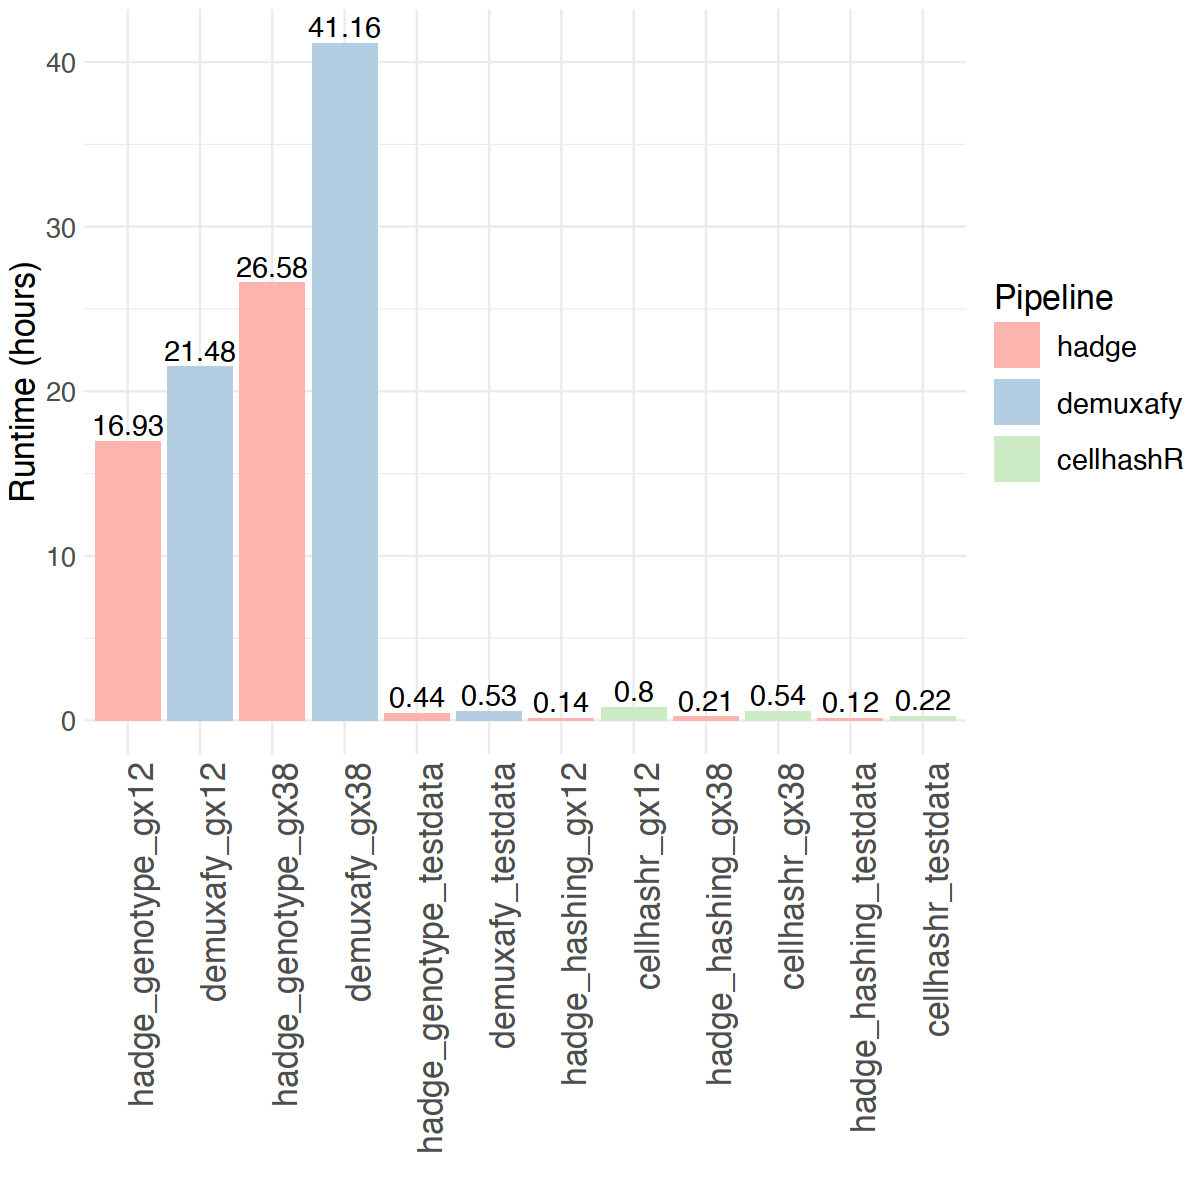

In [9]:
par(mar=c(2, 30, 1.5, 0.5))
ggplot(bm, aes(x=Run, y = Runtime, fill=Pipeline)) + geom_bar(stat="identity") +
  geom_text(aes(label=Runtime), vjust=-0.3, size=6)+ theme_minimal() + 
  ylab("Runtime (hours)") + xlab("") + 
  scale_fill_brewer(palette = "Pastel1", limits=c("hadge", "demuxafy", "cellhashR")) +
  theme(text = element_text(size = 20), 
        axis.text.x = element_text(angle = 90, hjust=1, size = 20),
        legend.title = element_text(size=20),
        legend.text = element_text(size=17),
        legend.key.size = unit(1, 'cm'),
        legend.spacing.y = unit(0.2, 'cm')) + guides(fill = guide_legend(byrow = TRUE))
#ggsave("BM_plot.pdf", width =10, height=10)   